<a href="https://colab.research.google.com/github/alexontour/snippets/blob/main/snip_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Alexander Kollmann, 08/2022**

---

**Funktion**

wichtige Plot/ Chart Funktionen

---



**Referenzen**

https://www.makeuseof.com/draw-graphs-jupyter-notebook/

https://colab.research.google.com/notebooks/charts.ipynb

https://jovian.ai/colab-roland/python-matplotlib-data-visualization

---



In [ ]:
import matplotlib.pyplot as plt

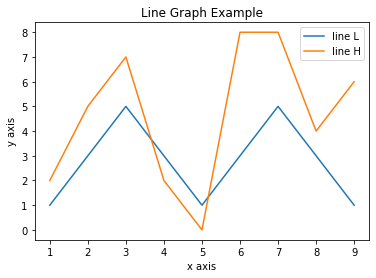

In [ ]:
# Line Chart
x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 5, 7, 2, 0, 8, 8, 4, 6]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()